# Similar Document Recommendations using Topic Modeling
> Training LDA topic model on 20-newsgroups dataset and finding similar documents using KNN

- toc: true
- badges: true
- comments: true
- categories: [LDA, Topic Modeling, Ktrain, KNN]
- image:

### Setup

In [ ]:
!pip install ktrain
!pip install stellargraph 

In [1]:
import os
import numpy as np
import pandas as pd

import ktrain

pd.set_option('display.max_colwidth', -1)
%matplotlib inline

Using LDA Topic modeling technique to find similar documents.

### What is Topic Model?

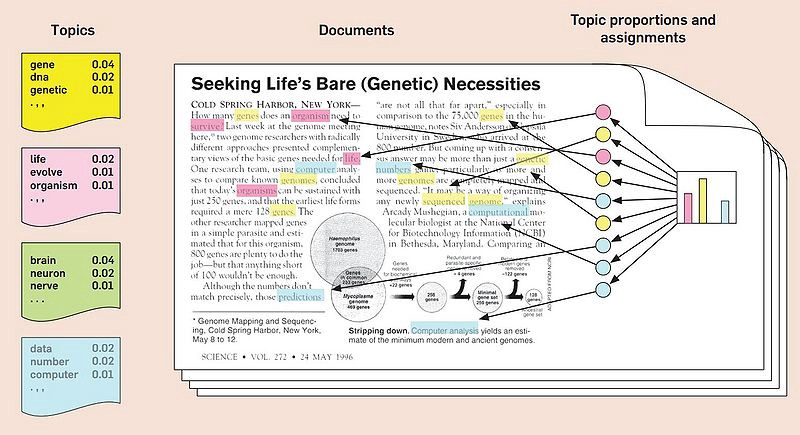

In natural language processing, the term topic means a set of words that “go together”. These are the words that come to mind when thinking of this topic. Take sports. Some such words are athlete, soccer, and stadium.

A topic model is one that automatically discovers topics occurring in a collection of documents.

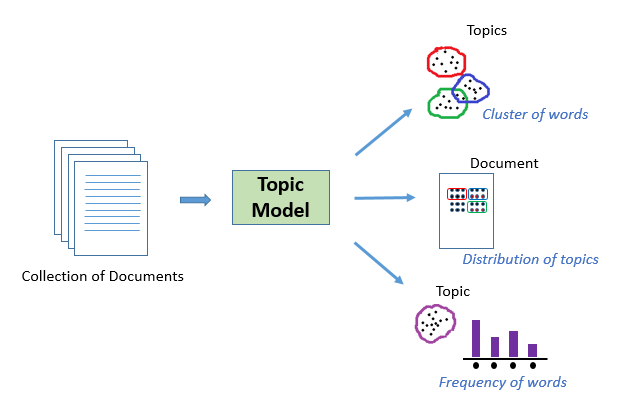

### Get Raw Document Data

A collection of ~18,000 newsgroup documents from 20 different newsgroups

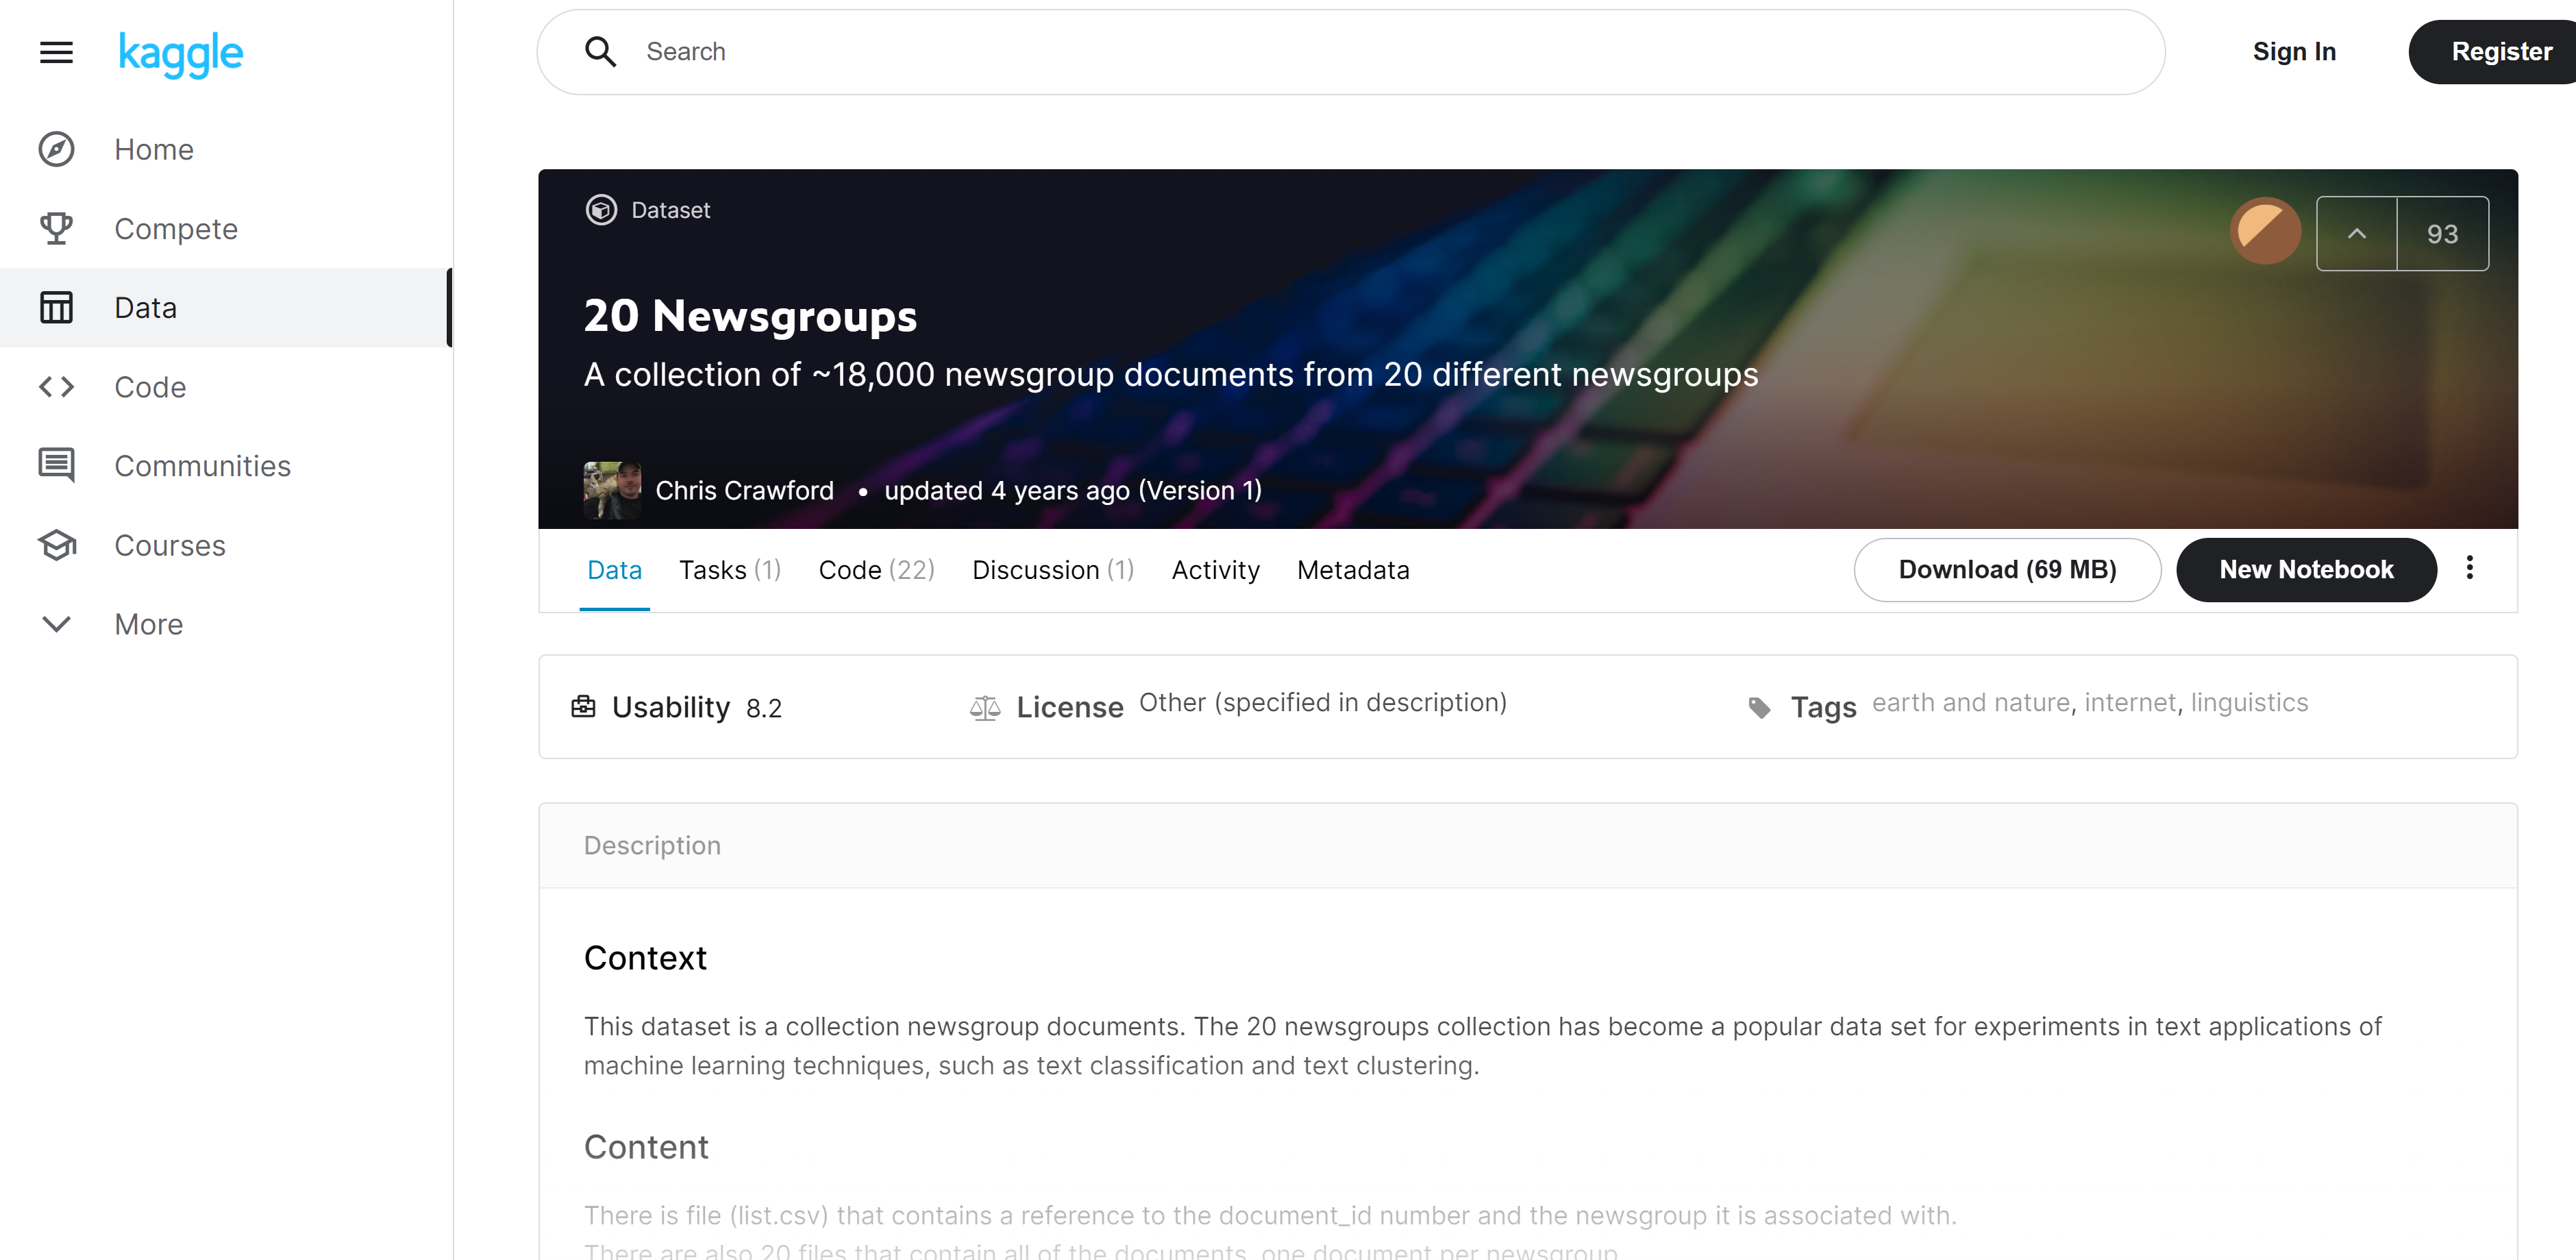

In [3]:
# 20newsgroups
from sklearn.datasets import fetch_20newsgroups
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', remove=remove)
texts = newsgroups_train.data +  newsgroups_test.data

In [8]:
texts[:10]

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't an

### Represent Documents as Semantically Meaningful Vectors With LDA

In [9]:
%%time
tm = ktrain.text.get_topic_model(texts, n_features=10000)

n_topics automatically set to 97
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
CPU times: user 2min 52s, sys: 2min 10s, total: 5min 2s
Wall time: 2min 38s


In [24]:
help(tm.build)

Help on method build in module ktrain.text.eda:

build(texts, threshold=None) method of ktrain.text.eda.TopicModel instance
    Builds the document-topic distribution showing the topic probability distirbution
    for each document in <texts> with respect to the learned topic space.
    Args:
        texts (list of str): list of text documents
        threshold (float): If not None, documents with whose highest topic probability
                           is less than threshold are filtered out.



In [10]:
%%time
tm.build(texts, threshold=0.25)

done.
CPU times: user 13.9 s, sys: 8.29 s, total: 22.2 s
Wall time: 12.9 s


### Train a Document Recommender

In [25]:
help(tm.train_recommender)

Help on method train_recommender in module ktrain.text.eda:

train_recommender(n_neighbors=20, metric='minkowski', p=2) method of ktrain.text.eda.TopicModel instance
    Trains a recommender that, given a single document, will return
    documents in the corpus that are semantically similar to it.
    
    Args:
        n_neighbors (int): 
    Returns:
        None



In [13]:
tm.train_recommender()

### Generate Recommendations

Given some text, recommend documents that are semantically relevant to it.

In [14]:
rawtext = """
            Elon Musk leads Space Exploration Technologies (SpaceX), where he oversees
            the development and manufacturing of advanced rockets and spacecraft for missions
            to and beyond Earth orbit.
            """

In [15]:
for i, doc in enumerate(tm.recommend(text=rawtext, n=5)):
    print('RESULT #%s'% (i+1))
    print('TEXT:\n\t%s' % (" ".join(doc['text'].split()[:500])))
    print()

RESULT #1
TEXT:
	Archive-name: space/new_probes Last-modified: $Date: 93/04/01 14:39:17 $ UPCOMING PLANETARY PROBES - MISSIONS AND SCHEDULES Information on upcoming or currently active missions not mentioned below would be welcome. Sources: NASA fact sheets, Cassini Mission Design team, ISAS/NASDA launch schedules, press kits. ASUKA (ASTRO-D) - ISAS (Japan) X-ray astronomy satellite, launched into Earth orbit on 2/20/93. Equipped with large-area wide-wavelength (1-20 Angstrom) X-ray telescope, X-ray CCD cameras, and imaging gas scintillation proportional counters. CASSINI - Saturn orbiter and Titan atmosphere probe. Cassini is a joint NASA/ESA project designed to accomplish an exploration of the Saturnian system with its Cassini Saturn Orbiter and Huygens Titan Probe. Cassini is scheduled for launch aboard a Titan IV/Centaur in October of 1997. After gravity assists of Venus, Earth and Jupiter in a VVEJGA trajectory, the spacecraft will arrive at Saturn in June of 2004. Upon arrival, t

### Saving and Restoring the Topic Model
The topic model can be saved and restored as follows.

In [16]:
tm.save('/content/tm')

In [17]:
tm = ktrain.text.load_topic_model('/content/tm')
tm.build(texts, threshold=0.25)

done.
done.


> Note: the scorer and recommender are not saved, only the LDA topic model is saved. So, the scorer and recommender should be retrained prior to use

In [18]:
tm.train_recommender()

In [19]:
rawtext = """
            Elon Musk leads Space Exploration Technologies (SpaceX), where he oversees
            the development and manufacturing of advanced rockets and spacecraft for missions
            to and beyond Earth orbit.
            """

In [20]:
#collapse-hide
print(tm.recommend(text=rawtext, n=1)[0]['text'])

Archive-name: space/new_probes
Last-modified: $Date: 93/04/01 14:39:17 $

UPCOMING PLANETARY PROBES - MISSIONS AND SCHEDULES

    Information on upcoming or currently active missions not mentioned below
    would be welcome. Sources: NASA fact sheets, Cassini Mission Design
    team, ISAS/NASDA launch schedules, press kits.


    ASUKA (ASTRO-D) - ISAS (Japan) X-ray astronomy satellite, launched into
    Earth orbit on 2/20/93. Equipped with large-area wide-wavelength (1-20
    Angstrom) X-ray telescope, X-ray CCD cameras, and imaging gas
    scintillation proportional counters.


    CASSINI - Saturn orbiter and Titan atmosphere probe. Cassini is a joint
    NASA/ESA project designed to accomplish an exploration of the Saturnian
    system with its Cassini Saturn Orbiter and Huygens Titan Probe. Cassini
    is scheduled for launch aboard a Titan IV/Centaur in October of 1997.
    After gravity assists of Venus, Earth and Jupiter in a VVEJGA
    trajectory, the spacecraft will arrive a